In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_csv('atusresp_2022.dat')
dfw = pd.read_csv('atuswgts_2022.dat')
data = pd.concat([df[['TRTALONE', 'TRTHHFAMILY', 'TRTSPOUSE', 'TRTFRIEND', 'TUFINLWGT']], dfw.iloc[:,1:]], axis=1)
data

,TRTALONE,TRTHHFAMILY,TRTSPOUSE,TRTFRIEND,TUFINLWGT,FINLWGT001,FINLWGT002,FINLWGT003,FINLWGT004,FINLWGT005,...,FINLWGT151,FINLWGT152,FINLWGT153,FINLWGT154,FINLWGT155,FINLWGT156,FINLWGT157,FINLWGT158,FINLWGT159,FINLWGT160
0,110,130,110,0,3.137241e+07,3.624214e+07,1.214573e+07,7.910804e+06,3.173069e+07,3.282820e+07,...,2.711224e+07,2.623171e+07,2.499714e+07,4.130800e+07,2.800590e+07,2.928938e+07,1.473688e+07,5.264838e+07,1.440730e+07,1.111050e+07
1,770,60,60,0,4.133324e+07,4.087972e+07,1.364146e+07,6.101072e+07,3.503566e+07,6.618234e+07,...,1.654993e+07,1.120812e+07,4.355246e+07,3.656052e+07,4.088884e+07,5.096607e+07,7.056945e+07,1.175070e+07,3.686901e+07,3.862475e+07
2,350,290,290,0,5.708959e+06,7.758584e+06,3.775725e+06,7.181488e+06,4.441060e+06,7.303731e+06,...,7.956070e+06,3.643081e+06,3.065983e+06,6.853712e+06,4.341191e+06,4.220547e+06,7.170466e+06,8.427307e+06,8.377367e+06,7.605681e+06
3,305,310,310,0,5.024633e+06,5.058774e+06,9.027562e+06,1.406275e+06,5.355050e+06,7.973622e+06,...,8.458902e+06,1.401158e+06,7.265356e+06,1.332676e+06,5.253343e+06,1.570586e+06,1.437712e+06,5.434073e+06,5.517851e+06,5.159627e+06
4,182,678,678,0,1.247984e+07,5.181116e+06,8.426048e+06,1.008295e+07,6.487109e+06,7.741333e+06,...,1.705016e+07,1.676788e+07,1.845723e+07,2.170031e+07,1.763906e+07,1.925115e+07,1.467302e+07,1.626870e+07,2.085094e+07,2.210286e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8131,70,337,337,0,2.418088e+07,2.588757e+07,2.310024e+07,2.879401e+07,2.079432e+07,2.271797e+07,...,2.361011e+07,2.542169e+07,2.293915e+07,2.213668e+07,2.261029e+07,2.769044e+07,2.775678e+07,2.545066e+07,2.473216e+07,2.485168e+07
8132,65,550,550,0,1.447649e+07,1.519409e+07,1.285099e+07,5.641910e+06,2.093284e+07,2.496085e+07,...,4.396870e+06,2.459491e+07,1.672020e+07,2.086592e+07,2.340494e+07,1.535498e+07,1.641074e+07,1.538820e+07,1.430855e+07,1.428631e+07
8133,330,0,0,0,9.266696e+06,6.908982e+06,6.363935e+06,4.848392e+06,1.379760e+07,5.403462e+06,...,5.370272e+06,1.177827e+07,1.462337e+07,5.575156e+06,5.061961e+06,1.494139e+07,5.752347e+06,4.848061e+06,1.277160e+07,1.282865e+07
8134,0,930,930,0,9.239151e+06,9.477269e+06,1.064652e+07,2.808491e+06,2.946859e+06,2.576544e+06,...,9.878468e+06,1.401727e+07,1.450837e+07,9.457581e+06,8.653890e+06,8.895844e+06,8.417942e+06,1.438232e+07,9.970079e+06,1.618737e+07


In [3]:
# Calculate descriptive statistics
# TRTALONE: Total nonwork-related time respondent spent alone every day (in minutes);
# TRTHHFAMILY: Total nonwork-related time respondent spent with household family members every day (in minutes);
# TRTSPOUSE: Total nonwork-related time respondent spent with spouse every day (in minutes);
# TRTFRIEND: Total nonwork-related time respondent spent with friends every day (in minutes).
data[['TRTALONE', 'TRTHHFAMILY', 'TRTSPOUSE', 'TRTFRIEND']].describe()

,TRTALONE,TRTHHFAMILY,TRTSPOUSE,TRTFRIEND
count,8136.000000,8136.000000,8136.000000,8136.000000
mean,345.119100,264.064651,191.002581,26.462758
std,283.180818,290.900921,266.371755,102.468319
min,0.000000,0.000000,0.000000,0.000000
25%,105.000000,0.000000,0.000000,0.000000
50%,280.000000,170.000000,0.000000,0.000000
75%,545.000000,480.000000,330.000000,0.000000
max,1440.000000,1290.000000,1290.000000,1230.000000


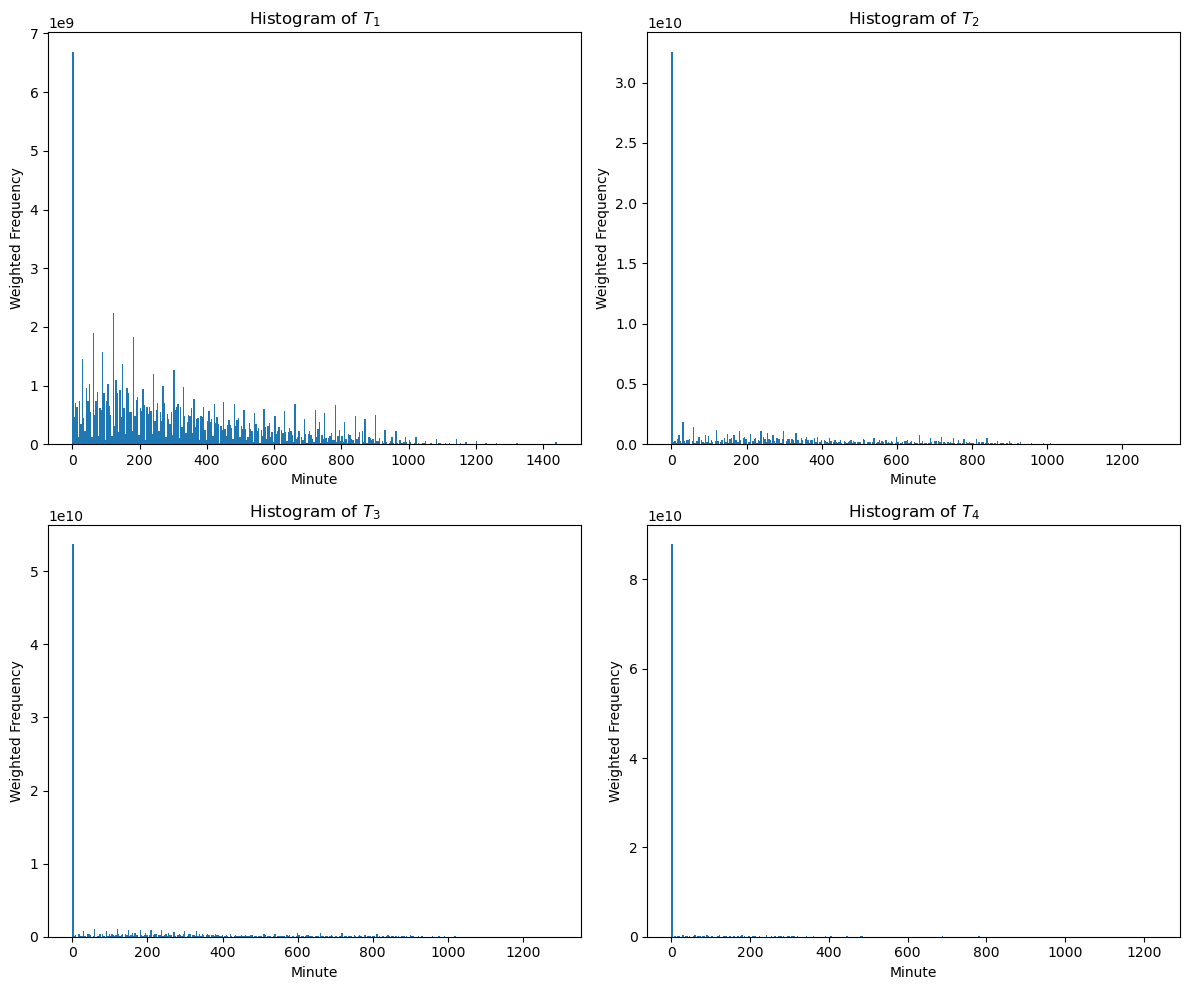

In [4]:
# Create a 2x2 grid of subplots with a specific size
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Set the number of bins for the histograms
bins = 360

# Plot the histogram for the first variable
axs[0,0].hist(data['TRTALONE'], weights=data['TUFINLWGT'], bins=bins, histtype='bar')
axs[0,0].set_title('Histogram of $T_1$')
axs[0,0].set_xlabel('Minute')
axs[0,0].set_ylabel('Weighted Frequency')

# Plot the histogram for the second variable
axs[0,1].hist(data['TRTHHFAMILY'], weights=data['TUFINLWGT'], bins=bins, histtype='bar')
axs[0,1].set_title('Histogram of $T_2$')
axs[0,1].set_xlabel('Minute')
axs[0,1].set_ylabel('Weighted Frequency')

# Plot the histogram for the third variable
axs[1,0].hist(data['TRTSPOUSE'], weights=data['TUFINLWGT'], bins=bins, histtype='bar')
axs[1,0].set_title('Histogram of $T_3$')
axs[1,0].set_xlabel('Minute')
axs[1,0].set_ylabel('Weighted Frequency')

# Plot the histogram for the fourth variable
axs[1,1].hist(data['TRTFRIEND'], weights=data['TUFINLWGT'], bins=bins, histtype='bar')
axs[1,1].set_title('Histogram of $T_4$')
axs[1,1].set_xlabel('Minute')
axs[1,1].set_ylabel('Weighted Frequency')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [5]:
# Calculate the weighted sum
total = (data[['TRTALONE', 'TRTHHFAMILY', 'TRTSPOUSE', 'TRTFRIEND']].values * data[['TUFINLWGT']].values).sum(axis=0)

# Calculate the total weight
N = data['TUFINLWGT'].values.sum()

# Calculate the estimated values by dividing the total by the total weight
est = total / N
est.round(2)

array([314.45, 245.1 , 158.87,  24.06])

In [6]:
T = ['TRTALONE', 'TRTHHFAMILY', 'TRTSPOUSE', 'TRTFRIEND']

# Define a function to calculate the estimated variance for a given index 't'
def est_var(t):
    # Calculate the weighted sum
    total = (data.loc[:, 'FINLWGT001':'FINLWGT160'].values * data[[T[t]]].values).sum(axis=0)
    # Calculate the total weight
    N = data.loc[:, 'FINLWGT001':'FINLWGT160'].values.sum(axis=0)
    # Calculate the estimated variance and return the result
    return ((total / N - est[t])**2).sum() / 40

# Create an empty array to store the variance values
var = np.array([0.0]*4)
# Iterate through each index and calculate the estimated variance
for i in range(4):
    var[i] = est_var(i)
    # Print the calculated variance for each index
    print(f'Var({T[i]}) = {var[i].round(2)}')

Var(TRTALONE) = 10.07
Var(TRTHHFAMILY) = 12.85
Var(TRTSPOUSE) = 7.57
Var(TRTFRIEND) = 1.64


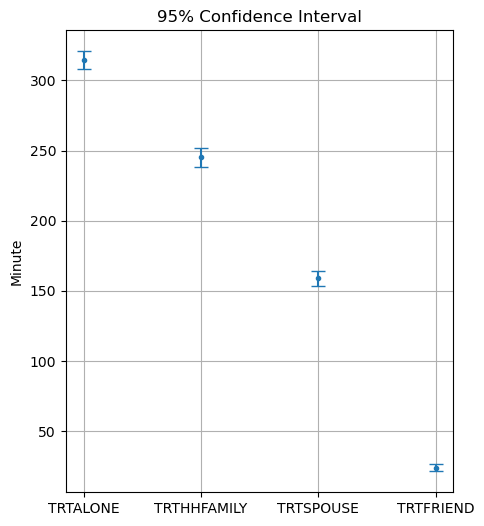

In [7]:
# Calculate the standard error
se = np.sqrt(var)

# Set the confidence level
confidence_level = 0.95

# Calculate the z critical value for the given confidence level
z_critical = stats.norm.ppf(confidence_level/2 + 0.5)

# Calculate the lower and upper bounds of the confidence interval
lower_bound = est - z_critical * se
upper_bound = est + z_critical * se

# Create a plot with error bars representing the confidence interval
plt.figure(figsize=(5, 6))
plt.errorbar(np.arange(len(est)), est, yerr=z_critical * se, fmt='.', capsize=5)
plt.ylabel('Minute')
plt.title(f'{int(confidence_level*100)}% Confidence Interval')
plt.xticks(np.arange(len(est)), T)
plt.grid(True)
plt.show()